In [1]:
import pandas as pd

from bs4 import BeautifulSoup
import requests
import seaborn as sns
import plotly.graph_objects as go
import re
import unicodedata as ucd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("prizes.csv")

In [3]:
df.head()

,year,category,overallMotivation,id,firstname,surname,motivation,share
0,2017,physics,NaN,941,Rainer,Weiss,"""for decisive contributions to the LIGO detect...",2
1,2017,physics,NaN,942,Barry C.,Barish,"""for decisive contributions to the LIGO detect...",4
2,2017,physics,NaN,943,Kip S.,Thorne,"""for decisive contributions to the LIGO detect...",4
3,2017,chemistry,NaN,944,Jacques,Dubochet,"""for developing cryo-electron microscopy for t...",3
4,2017,chemistry,NaN,945,Joachim,Frank,"""for developing cryo-electron microscopy for t...",3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 8 columns):
year                 923 non-null int64
category             923 non-null object
overallMotivation    14 non-null object
id                   923 non-null int64
firstname            923 non-null object
surname              892 non-null object
motivation           835 non-null object
share                923 non-null int64
dtypes: int64(3), object(5)
memory usage: 57.8+ KB


website_url = requests.get('https://en.wikipedia.org/wiki/List_of_Nobel_laureates_in_Literature').text
soup = BeautifulSoup(website_url,'lxml')
my_table = soup.find('table',{'class':'wikitable sortable'})

#my_table = soup.fine('table',{'class':'wikitable sortable'})
links = my_table.findAll('a')

print(links[4])

In [5]:
literature = pd.read_csv("literature.csv")

In [6]:
literature.head()

,Unnamed: 0,0,1,2,3,4,5
0,0,1901,Sully Prudhomme,France,French,"""in special recognition of his poetic composit...","poetry, essay"
1,1,1902,Theodor Mommsen,Germany,German,"""the greatest living master of the art of hist...","history, law"
2,2,1903,Bjørnstjerne Bjørnson,Norway,Norwegian,"""as a tribute to his noble, magnificent and ve...","poetry, novel, drama"
3,3,1904,Frédéric Mistral,France,Provençal,"""in recognition of the fresh originality and t...","poetry, philology"
4,4,1904,José Echegaray,Spain,Spanish,"""in recognition of the numerous and brilliant ...",drama


In [7]:
literature.columns = ["Unnamed: 0","year","name","country","language","citation","genre"]

In [8]:

literature.head()

,Unnamed: 0,year,name,country,language,citation,genre
0,0,1901,Sully Prudhomme,France,French,"""in special recognition of his poetic composit...","poetry, essay"
1,1,1902,Theodor Mommsen,Germany,German,"""the greatest living master of the art of hist...","history, law"
2,2,1903,Bjørnstjerne Bjørnson,Norway,Norwegian,"""as a tribute to his noble, magnificent and ve...","poetry, novel, drama"
3,3,1904,Frédéric Mistral,France,Provençal,"""in recognition of the fresh originality and t...","poetry, philology"
4,4,1904,José Echegaray,Spain,Spanish,"""in recognition of the numerous and brilliant ...",drama


In [9]:
physics = pd.read_csv("physics.csv")

In [10]:
physics.head(6)

,Unnamed: 0,0,1,2,3
0,0,1901,Wilhelm Conrad Röntgen,Germany,"""in recognition of the extraordinary services ..."
1,1,1902,Hendrik Lorentz,Netherlands,"""in recognition of the extraordinary service t..."
2,2,1902,Pieter Zeeman,Netherlands,NaN
3,3,1903,Antoine Henri Becquerel,France,"""for his discovery of spontaneous radioactivity"""
4,4,1903,Pierre Curie,France,"""for their joint researches on the radiation p..."
5,5,NaN,Maria Skłodowska-Curie,Poland,NaN


In [11]:
physics.columns = ["Unamed: 0","year","name","country","citation"]

In [12]:
physics.head()

,Unamed: 0,year,name,country,citation
0,0,1901,Wilhelm Conrad Röntgen,Germany,"""in recognition of the extraordinary services ..."
1,1,1902,Hendrik Lorentz,Netherlands,"""in recognition of the extraordinary service t..."
2,2,1902,Pieter Zeeman,Netherlands,NaN
3,3,1903,Antoine Henri Becquerel,France,"""for his discovery of spontaneous radioactivity"""
4,4,1903,Pierre Curie,France,"""for their joint researches on the radiation p..."


In [13]:
peace = pd.read_csv("peace.csv")

In [14]:
peace.head()

,Year,Laureate,Laureate.1,Country,Rationale
0,1901,NaN,Henry Dunant,Switzerland,For his role in founding the International Com...
1,1901,NaN,Frédéric Passy,France,"""[For] being one of the main founders of the I..."
2,1902,NaN,Élie Ducommun,Switzerland,"""[For his role as] the first honorary secretar..."
3,1902,NaN,Charles Albert Gobat,Switzerland,"""[For his role as the] first Secretary General..."
4,1903,NaN,William Randal Cremer,United Kingdom,"""[For his role as] the 'first father' of the I..."


In [15]:
econ = pd.read_csv("economics.csv")
med = pd.read_csv("medicine.csv")
chem = pd.read_csv("chemistry.csv")

In [16]:
econ.head()

,Year,Unnamed: 1,Laureate,Country,Rationale,Ph.D. alma mater,Institution (most significant tenure/at time of receipt)
0,1969,NaN,Ragnar Frisch,Norway,"""for having developed and applied dynamic mode...",University of Oslo,University of Oslo
1,1969,NaN,Jan Tinbergen,Netherlands,"""for having developed and applied dynamic mode...",Leiden University,Erasmus University
2,1970,NaN,Paul Samuelson,United States,"""for the scientific work through which he has ...",Harvard University,Massachusetts Institute of Technology
3,1971,NaN,Simon Kuznets,United States,"""for his empirically founded interpretation of...",Columbia University,Harvard University
4,1972,NaN,John Hicks,United Kingdom,"""for their pioneering contributions to general...",University of Oxford,University of Oxford


In [17]:
med.head()

,Year,Image,Laureate[A],Country[B],Rationale[C],Ref
0,1901,NaN,Emil Adolf von Behring,Germany,"""for his work on serum therapy, especially its...",[13]
1,1902,NaN,Sir Ronald Ross,United Kingdom India,"""for his work on malaria, by which he has show...",[14]
2,1903,NaN,Niels Ryberg Finsen,Denmark( Faroe Islands),"""[for] his contribution to the treatment of di...",[15]
3,1904,NaN,Ivan Petrovich Pavlov,Russia,"""in recognition of his work on the physiology ...",[16]
4,1905,NaN,Robert Koch,Germany,"""for his investigations and discoveries in rel...",[17]


In [18]:
chem.head()

,Year,Image,Laureate[A],Country[B],Rationale[C],Ref
0,1901,NaN,Jacobus Henricus van 't Hoff,Netherlands,"""[for his] discovery of the laws of chemical d...",[18]
1,1902,NaN,Hermann Emil Fischer,Germany,"""[for] his work on sugar and purine syntheses""",[19]
2,1903,NaN,Svante August Arrhenius,Sweden,"""[for] his electrolytic theory of dissociation""",[20]
3,1904,NaN,Sir William Ramsay,United Kingdom,"""[for his] discovery of the inert gaseous elem...",[21]
4,1905,NaN,Johann Friedrich Wilhelm Adolf von Baeyer,Germany,"""[for] the advancement of organic chemistry an...",[22]


In [19]:
chem["category"] = "Chemistry"
med["category"] = "Physiology"
econ["category"] = "Economics"
peace["category"] = "Peace"
physics["category"] = "Category"

## Physics

In [20]:
countries = []
for country in physics["country"]:
    #print(type(country))
    if isinstance(country,str):
        country = re.sub("[\(\[].*?[\)\]]", "", country)
        country = ucd.normalize('NFKD',country).replace(" ",'')
    countries.append(country)
physics["country"] = countries

In [21]:
physicsByCountry = physics.groupby("country").count().sort_values(by="Unamed: 0",ascending=False)
physicsByCountry["category"] = "Physics"

In [22]:
physicsByCountry.head()

,Unamed: 0,year,name,citation,category
country,,,,,
UnitedStates,72,58,72,41,Physics
UnitedKingdom,20,19,20,14,Physics
Germany,14,12,14,7,Physics
France,11,11,11,10,Physics
Japan,9,8,9,5,Physics


In [23]:
physicsByCountry.reset_index(inplace=True)

In [24]:
physicsByCountry.drop("Unamed: 0",axis=1,inplace=True)

In [25]:
physicsByCountry.columns = ["country","year","name","citation","category"]

In [26]:
physicsByCountryNums = physicsByCountry[["country","year","category"]]

## Literature

In [27]:
countries = []
for country in literature["country"]:
    #print(type(country))
    if isinstance(country,str):
        country = re.sub("[\(\[].*?[\)\]]", "", country)
        country = ucd.normalize('NFKD',country).replace(" ",'')
    countries.append(country)
literature["country"] = countries

In [28]:
literature.head()

,Unnamed: 0,year,name,country,language,citation,genre
0,0,1901,Sully Prudhomme,France,French,"""in special recognition of his poetic composit...","poetry, essay"
1,1,1902,Theodor Mommsen,Germany,German,"""the greatest living master of the art of hist...","history, law"
2,2,1903,Bjørnstjerne Bjørnson,Norway,Norwegian,"""as a tribute to his noble, magnificent and ve...","poetry, novel, drama"
3,3,1904,Frédéric Mistral,France,Provençal,"""in recognition of the fresh originality and t...","poetry, philology"
4,4,1904,José Echegaray,Spain,Spanish,"""in recognition of the numerous and brilliant ...",drama


In [29]:
litByCountry = literature.groupby("country").count().sort_values(by="Unnamed: 0",ascending=False)
litByCountry["category"] = "Literature"

In [30]:
litByCountry.head()

,Unnamed: 0,year,name,language,citation,genre,category
country,,,,,,,
France,14,14,14,14,14,14,Literature
UnitedStates,10,10,10,10,10,10,Literature
UnitedKingdom,10,10,10,10,10,10,Literature
Sweden,8,8,8,8,8,8,Literature
Germany,7,7,7,7,7,7,Literature


In [31]:
litByCountry.reset_index(inplace=True)

In [32]:
litByCountry.columns = ["country","unnamed: 0","year","name","language","citation","genre","category"]

In [33]:
litByCountry.drop("unnamed: 0",axis=1,inplace=True)

In [34]:
litByCountryNums = litByCountry[["country","year","category"]]

## Peace

In [35]:
countries = []
for country in peace["Country"]:
    #print(type(country))
    if isinstance(country,str):
        country = re.sub("[\(\[].*?[\)\]]", "", country)
        country = ucd.normalize('NFKD',country).replace(" ",'')
    countries.append(country)
peace["Country"] = countries

In [36]:
peace.head()

,Year,Laureate,Laureate.1,Country,Rationale,category
0,1901,NaN,Henry Dunant,Switzerland,For his role in founding the International Com...,Peace
1,1901,NaN,Frédéric Passy,France,"""[For] being one of the main founders of the I...",Peace
2,1902,NaN,Élie Ducommun,Switzerland,"""[For his role as] the first honorary secretar...",Peace
3,1902,NaN,Charles Albert Gobat,Switzerland,"""[For his role as the] first Secretary General...",Peace
4,1903,NaN,William Randal Cremer,UnitedKingdom,"""[For his role as] the 'first father' of the I...",Peace


In [37]:
peace["Country"].unique()

array(['Switzerland', 'France', 'UnitedKingdom', 'Belgium',
       'Austria-Hungary', 'UnitedStates', 'Italy', 'Sweden', 'Denmark',
       'Netherlands', 'NotawardedduetoWorldWarI.', 'Norway', 'Notawarded',
       'Germany', 'Argentina', 'LeagueofNations',
       'NotawardedduetoWorldWarII.', nan,
       'Notawardedbecause"therewasnosuitablelivingcandidate."',
       'UnitedNations', 'Canada', 'SouthAfrica', 'WestGermany', 'Vietnam',
       'Ireland', 'Japan', 'SovietUnion', 'Egypt', 'IsraelPoland',
       'India', 'Mexico', 'Poland', 'CostaRica', 'Burma', 'Guatemala',
       'Palestine', 'Israel', 'EastTimor', 'SouthKorea', 'Ghana', 'Iran',
       'Kenya', 'Bangladesh', 'Finland', 'China', 'Liberia', 'Yemen',
       'EuropeanUnion', 'Pakistan', 'Tunisia', 'Colombia',
       'DemocraticRepublicoftheCongo', 'Iraq'], dtype=object)

In [38]:
peaceByCountry = peace.groupby("Country").count().sort_values(by="Year",ascending=False)
peaceByCountry["category"] = "Peace"

In [39]:
peaceByCountry.drop("Notawarded",inplace=True)
peaceByCountry.drop('Notawardedbecause"therewasnosuitablelivingcandidate."',inplace=True)
peaceByCountry.drop("NotawardedduetoWorldWarI.",inplace=True)
peaceByCountry.drop("NotawardedduetoWorldWarII.",inplace=True)

In [40]:
peaceByCountry.index.unique()

Index(['UnitedStates', 'UnitedKingdom', 'Switzerland', 'France',
       'UnitedNations', 'Sweden', 'SouthAfrica', 'Belgium', 'India', 'Germany',
       'Austria-Hungary', 'Israel', 'Ireland', 'Liberia', 'Netherlands',
       'Poland', 'Argentina', 'SovietUnion', 'Egypt', 'EastTimor', 'Canada',
       'Bangladesh', 'Norway', 'SouthKorea', 'Palestine', 'Pakistan',
       'Tunisia', 'Vietnam', 'WestGermany', 'Japan', 'Mexico',
       'LeagueofNations', 'Burma', 'China', 'Colombia', 'CostaRica',
       'DemocraticRepublicoftheCongo', 'Denmark', 'EuropeanUnion', 'Finland',
       'Ghana', 'Guatemala', 'Iran', 'Iraq', 'IsraelPoland', 'Italy', 'Kenya',
       'Yemen'],
      dtype='object', name='Country')

In [41]:
peaceByCountry.head()

,Year,Laureate,Laureate.1,Rationale,category
Country,,,,,
UnitedStates,22,0,22,22,Peace
UnitedKingdom,11,0,11,11,Peace
Switzerland,11,0,11,11,Peace
France,9,0,9,9,Peace
UnitedNations,8,0,8,8,Peace


In [42]:
peaceByCountry.reset_index(inplace=True)
peaceByCountry.columns = ["country","year","laureate","laureate.1","rationale","category"]

In [43]:
peaceByCountry.drop("laureate.1",axis=1,inplace=True)

In [44]:
peaceByCountryNums = peaceByCountry[["country","year","category"]]

In [45]:
peaceByCountryNums["country"].unique()

array(['UnitedStates', 'UnitedKingdom', 'Switzerland', 'France',
       'UnitedNations', 'Sweden', 'SouthAfrica', 'Belgium', 'India',
       'Germany', 'Austria-Hungary', 'Israel', 'Ireland', 'Liberia',
       'Netherlands', 'Poland', 'Argentina', 'SovietUnion', 'Egypt',
       'EastTimor', 'Canada', 'Bangladesh', 'Norway', 'SouthKorea',
       'Palestine', 'Pakistan', 'Tunisia', 'Vietnam', 'WestGermany',
       'Japan', 'Mexico', 'LeagueofNations', 'Burma', 'China', 'Colombia',
       'CostaRica', 'DemocraticRepublicoftheCongo', 'Denmark',
       'EuropeanUnion', 'Finland', 'Ghana', 'Guatemala', 'Iran', 'Iraq',
       'IsraelPoland', 'Italy', 'Kenya', 'Yemen'], dtype=object)

## Economics

In [46]:
countries = []
for country in econ["Country"]:
    #print(type(country))
    if isinstance(country,str):
        country = re.sub("[\(\[].*?[\)\]]", "", country)
        country = ucd.normalize('NFKD',country).replace(" ",'')
    countries.append(country)
econ["Country"] = countries

In [47]:
econByCountry = econ.groupby("Country").count().sort_values(by="Year",ascending=False)
econByCountry["category"] = "Economics"

In [48]:
econByCountry.head()

,Year,Unnamed: 1,Laureate,Rationale,Ph.D. alma mater,Institution (most significant tenure/at time of receipt),category
Country,,,,,,,
UnitedStates,47,0,47,47,47,47,Economics
UnitedKingdom,6,0,6,6,6,6,Economics
Norway,3,0,3,3,3,3,Economics
France,3,0,3,3,3,3,Economics
CanadaUnitedStates,2,0,2,2,2,2,Economics


In [49]:
econByCountry.reset_index(inplace=True)

In [50]:
econByCountry.columns = ["country","year","Unnamed: 1","laureate","rationale","ph.d alma mater","institution","category"]

In [51]:
econByCountry.drop("Unnamed: 1",axis=1,inplace=True)

In [52]:
econByCountryNums = econByCountry[["country","year","category"]]

In [53]:
econByCountryNums.head()

,country,year,category
0,UnitedStates,47,Economics
1,UnitedKingdom,6,Economics
2,Norway,3,Economics
3,France,3,Economics
4,CanadaUnitedStates,2,Economics


## Medicine

In [54]:
countries = []
for country in med["Country[B]"]:
    #print(type(country))
    if isinstance(country,str):
        country = re.sub("[\(\[].*?[\)\]]", "", country)
        country = ucd.normalize('NFKD',country).replace(" ",'')
    countries.append(country)
med["Country[B]"] = countries

In [55]:
med.head()

,Year,Image,Laureate[A],Country[B],Rationale[C],Ref,category
0,1901,NaN,Emil Adolf von Behring,Germany,"""for his work on serum therapy, especially its...",[13],Physiology
1,1902,NaN,Sir Ronald Ross,UnitedKingdomIndia,"""for his work on malaria, by which he has show...",[14],Physiology
2,1903,NaN,Niels Ryberg Finsen,Denmark,"""[for] his contribution to the treatment of di...",[15],Physiology
3,1904,NaN,Ivan Petrovich Pavlov,Russia,"""in recognition of his work on the physiology ...",[16],Physiology
4,1905,NaN,Robert Koch,Germany,"""for his investigations and discoveries in rel...",[17],Physiology


In [56]:
medByCountry = med.groupby("Country[B]").count().sort_values(by="Year",ascending=False)
medByCountry["category"] = "Physiology"

In [57]:
medByCountry.drop("Notawarded",inplace=True)

In [58]:
medByCountry.head()

,Year,Image,Laureate[A],Rationale[C],Ref,category
Country[B],,,,,,
UnitedStates,90,0,90,90,90,Physiology
UnitedKingdom,26,0,26,26,26,Physiology
Germany,12,0,12,12,12,Physiology
France,11,0,11,11,11,Physiology
Sweden,7,0,7,7,7,Physiology


In [59]:
medByCountry.reset_index(inplace=True)

In [60]:
medByCountry.columns = ["country","year","image","laureate","rationale","ref","category"]

In [61]:
medByCountryNums = medByCountry[["country","year","category"]]

In [62]:
medByCountryNums.head()

,country,year,category
0,UnitedStates,90,Physiology
1,UnitedKingdom,26,Physiology
2,Germany,12,Physiology
3,France,11,Physiology
4,Sweden,7,Physiology


## Chemistry

In [63]:
countries = []
for country in chem["Country[B]"]:
    #print(type(country))
    if isinstance(country,str):
        country = re.sub("[\(\[].*?[\)\]]", "", country)
        country = ucd.normalize('NFKD',country).replace(" ",'')
    countries.append(country)
chem["Country[B]"] = countries

In [64]:
chem.head()

,Year,Image,Laureate[A],Country[B],Rationale[C],Ref,category
0,1901,NaN,Jacobus Henricus van 't Hoff,Netherlands,"""[for his] discovery of the laws of chemical d...",[18],Chemistry
1,1902,NaN,Hermann Emil Fischer,Germany,"""[for] his work on sugar and purine syntheses""",[19],Chemistry
2,1903,NaN,Svante August Arrhenius,Sweden,"""[for] his electrolytic theory of dissociation""",[20],Chemistry
3,1904,NaN,Sir William Ramsay,UnitedKingdom,"""[for his] discovery of the inert gaseous elem...",[21],Chemistry
4,1905,NaN,Johann Friedrich Wilhelm Adolf von Baeyer,Germany,"""[for] the advancement of organic chemistry an...",[22],Chemistry


In [65]:
chemByCountry = chem.groupby("Country[B]").count().sort_values(by="Year",ascending=False)
chemByCountry["category"] = "Chemistry"

In [66]:
chemByCountry.drop("Notawarded",inplace=True)

In [67]:
chemByCountry.reset_index(inplace=True)

In [68]:
chemByCountry.head()

,Country[B],Year,Image,Laureate[A],Rationale[C],Ref,category
0,UnitedStates,59,0,59,59,59,Chemistry
1,UnitedKingdom,26,0,26,26,26,Chemistry
2,Germany,18,0,18,18,18,Chemistry
3,WestGermany,10,0,10,10,10,Chemistry
4,France,8,0,8,8,8,Chemistry


In [69]:
chemByCountry.columns = ["country","year","image","laureate","rationale","ref","category"]

In [70]:
chemByCountryNums = chemByCountry[["country","year","category"]]

In [71]:
chemByCountryNums.head()

,country,year,category
0,UnitedStates,59,Chemistry
1,UnitedKingdom,26,Chemistry
2,Germany,18,Chemistry
3,WestGermany,10,Chemistry
4,France,8,Chemistry


# Merge

physicsByCountryNum,
litByCountryNum,
peaceByCountryNum,
econByCountryNum,
medByCountryNum,
chemByCountryNum

In [72]:
all_dfs = [physicsByCountryNums, litByCountryNums, peaceByCountryNums, econByCountryNums, medByCountryNums, chemByCountryNums]

In [105]:
litByCountryNums.head()

,country,year,category
0,France,14,Literature
1,UnitedStates,10,Literature
2,UnitedKingdom,10,Literature
3,Sweden,8,Literature
4,Germany,7,Literature


In [99]:
all_dfsTop5 = [physicsByCountryNums[:5], litByCountryNums[:5], peaceByCountryNums[:5], econByCountryNums[:5], medByCountryNums[:5], chemByCountryNums[:5]]

In [100]:
all_top5 = pd.concat(all_dfsTop5).reset_index(drop=True)

In [101]:
all_top5.head()

,country,year,category
0,UnitedStates,58,Physics
1,UnitedKingdom,19,Physics
2,Germany,12,Physics
3,France,11,Physics
4,Japan,8,Physics


In [102]:
all_top5.columns = ["Country","Number Of Laureates","Category"]

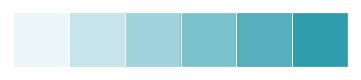

In [103]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))
sns.set(rc={'figure.figsize':(20,20)})
sns.set_palette(sns.diverging_palette(220, 20, n=7))
sns.set(font_scale=2)

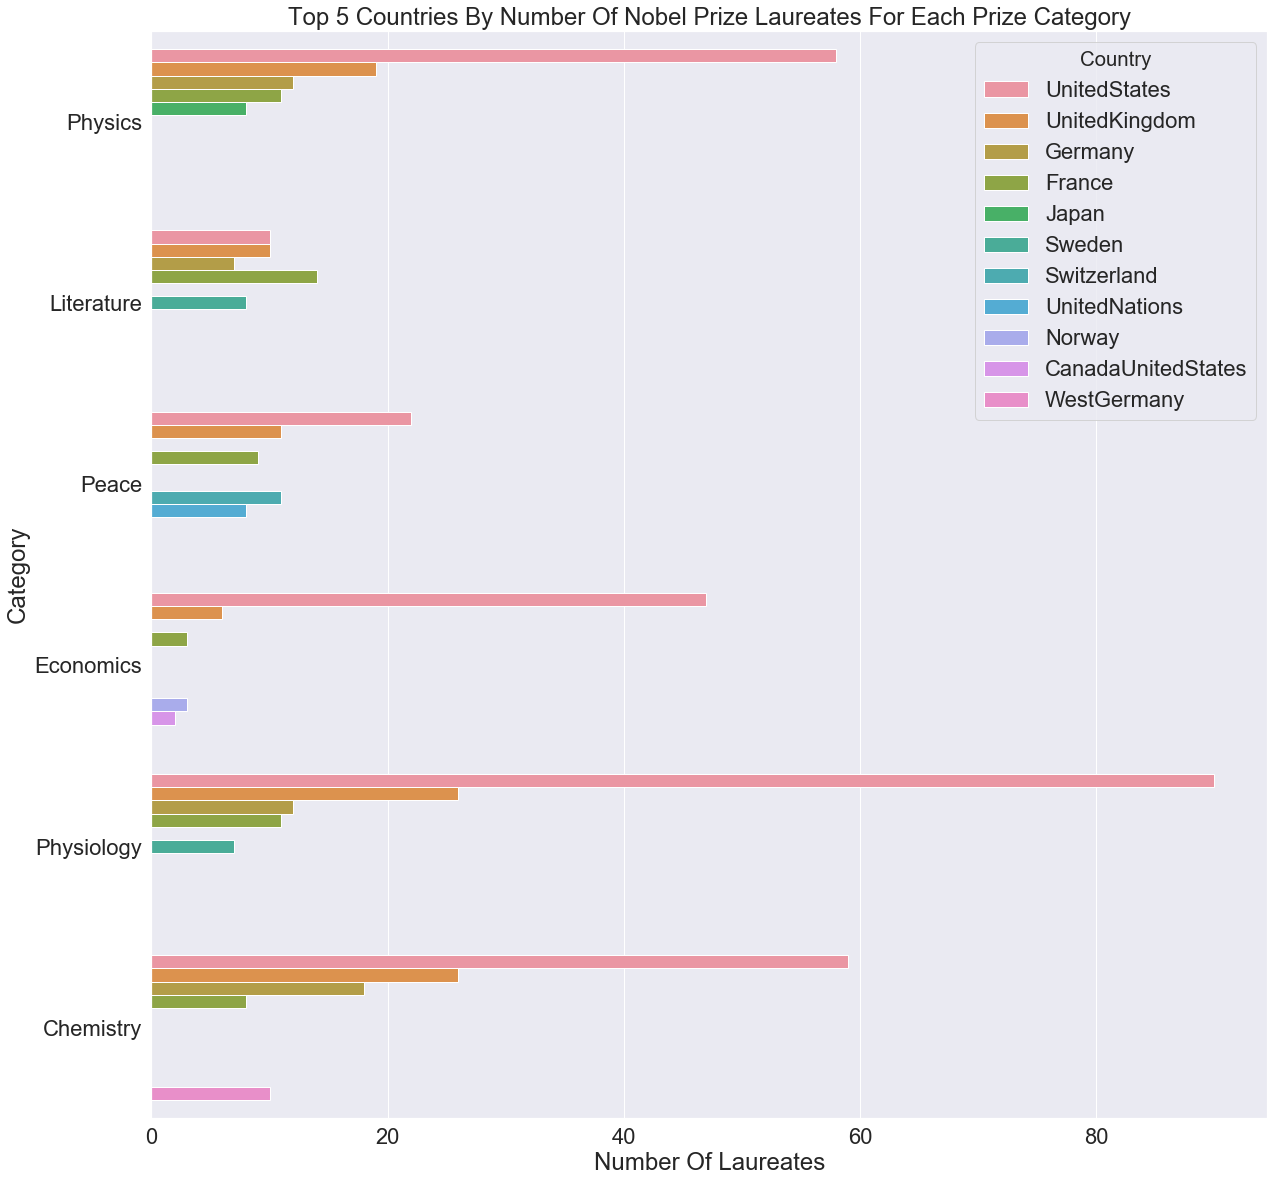

In [112]:
ax = sns.barplot(x="Number Of Laureates", y="Category",hue="Country", data=all_top5)
#ax.set_xticklabels(all_top5["country"],rotation=30)
ax.set_title("Top 5 Countries By Number Of Nobel Prize Laureates For Each Prize Category")
fig = ax.get_figure()
fig.savefig("top5LaureatesByCountry.png")

## Literature Split

In [78]:
literature.head()

,Unnamed: 0,year,name,country,language,citation,genre
0,0,1901,Sully Prudhomme,France,French,"""in special recognition of his poetic composit...","poetry, essay"
1,1,1902,Theodor Mommsen,Germany,German,"""the greatest living master of the art of hist...","history, law"
2,2,1903,Bjørnstjerne Bjørnson,Norway,Norwegian,"""as a tribute to his noble, magnificent and ve...","poetry, novel, drama"
3,3,1904,Frédéric Mistral,France,Provençal,"""in recognition of the fresh originality and t...","poetry, philology"
4,4,1904,José Echegaray,Spain,Spanish,"""in recognition of the numerous and brilliant ...",drama


In [79]:
genreList = []
for genre in literature["genre"]:
    print(genre)
    if isinstance(genre,str):
        genre = genre.split(',')
        genre = [x.rstrip() for x in genre]
    genreList.append(genre)

poetry, essay
history, law
poetry, novel, drama
poetry, philology
drama
novel
poetry
novel, short story, poetry
philosophy
novel, short story
poetry, drama, novel, short story
drama, poetry, essay
drama, novel
poetry, novel, drama, short story, music, essay, philosophy, literary criticism, translation
nan
novel
poetry, novel
poetry
novel
nan
poetry
novel
novel, poetry
drama
poetry
novel
drama, literary criticism
poetry, novel
philosophy
novel
novel, short story, essay
novel, short story, drama
poetry
novel
short story, poetry, novel
drama, novel, short story
nan
drama
novel
novel, biography
novel
nan
nan
nan
nan
novel, short story
poetry
novel, poetry
novel, essay
poetry
novel, short story
philosophy
poetry, novel, short story, drama
novel, short story
history, essay, memoirs
novel, short story, screenplay
novel, short story, drama, poetry
poetry
novel, short story, drama, philosophy, essay
novel, poetry, translation
poetry
poetry
novel, short story
novel, short story, screenplay
poetr

In [80]:
literature["language"].unique()

array(['French', 'German', 'Norwegian', 'Provençal', 'Spanish', 'Polish',
       'Italian', 'English', 'Swedish', 'Bengali and English', nan,
       'Danish', 'Russian', 'Finnish', 'Icelandic', 'Serbo-Croatian',
       'Greek', 'Hebrew', 'Japanese', 'English and French', 'Yiddish',
       'Czech', 'Russian and English', 'Arabic', 'Portuguese', 'Chinese',
       'Hungarian', 'Turkish'], dtype=object)

In [81]:
language = literature.groupby("language").count()

In [82]:
language.index

Index(['Arabic', 'Bengali and English', 'Chinese', 'Czech', 'Danish',
       'English', 'English and French', 'Finnish', 'French', 'German', 'Greek',
       'Hebrew', 'Hungarian', 'Icelandic', 'Italian', 'Japanese', 'Norwegian',
       'Polish', 'Portuguese', 'Provençal', 'Russian', 'Russian and English',
       'Serbo-Croatian', 'Spanish', 'Swedish', 'Turkish', 'Yiddish'],
      dtype='object', name='language')

In [83]:
language.columns = ["Number of Laureates","year","name","country","citation","genre"]

In [84]:
language.sort_values(by="Number of Laureates",ascending=False,inplace=True)

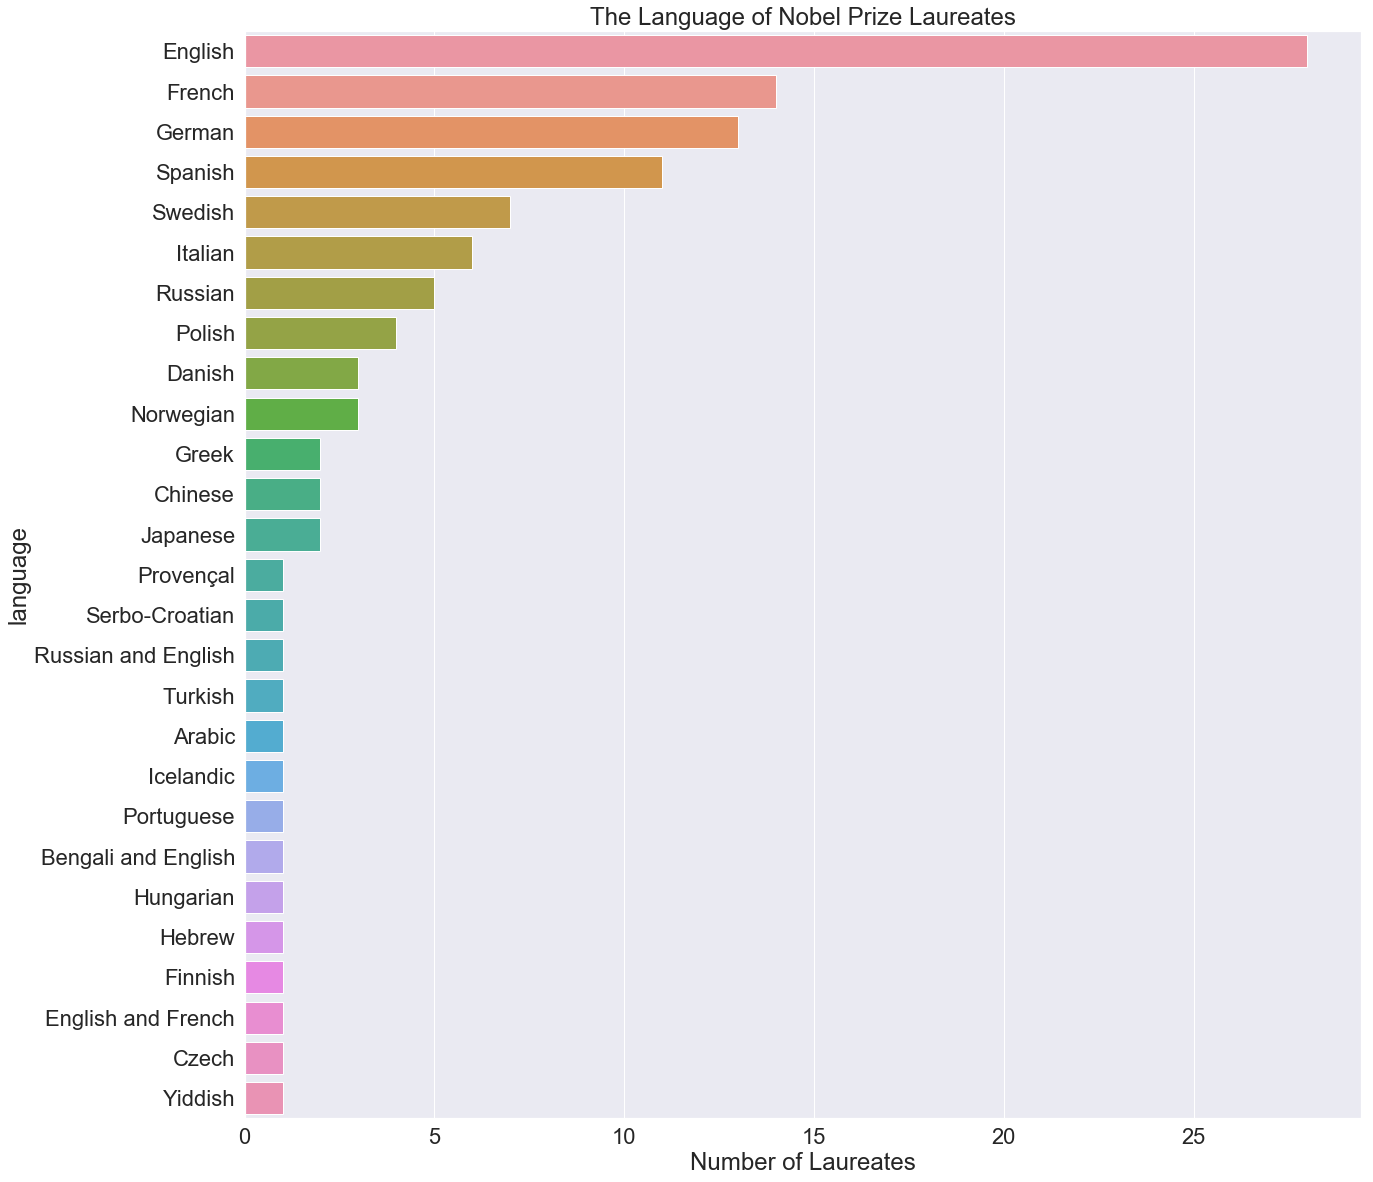

In [85]:
ax = sns.barplot(x="Number of Laureates",y=language.index,data=language.sort_values(by="year",ascending=False))
#ax.set_xticklabels(all_top5["country"],rotation=30)
ax.set_title("The Language of Nobel Prize Laureates")
fig = ax.get_figure()
fig.savefig("languageByLaureates.png")